# Mobile Price Prediction

Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. In this dataset, we want to estimate the price of mobile phones using the above features.

In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(10,6))
import warnings
import random
warnings.filterwarnings('ignore')

### About the Features

**Product_id** : ID of each cellphone <br>
**Price** : Price of each cellphone<br>
**Sale** : Sales number<br>
**weight** : Weight of each cellphone<br>
**resoloution** : Resoloution of each cellphone<br>
**ppi** : Phone Pixel Density<br>
**cpu core** : type of CPU core in each cellphone<br>
**cpu freq** : CPU Frequency in each cellphone<br>
**internal mem** : Internal memory of each cellphone<br>
**ram** : RAM of each cellphone<br>

In [2]:
data = pd.read_csv("Cellphone.csv")
data.rename(columns = {'Product_id':'product_id',
                       'Price':'price',
                       'Sale':'sale',
                       'resoloution':'resolution',
                       'cpu core':'cpu_core',
                       'cpu freq':'cpu_freq',
                       'internal mem':'internal_mem',
                       'RearCam':'rear_cam',
                       'Front_Cam':'front_cam',}, inplace = True)
data.head()

,product_id,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
data.shape

(161, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    161 non-null    int64  
 1   price         161 non-null    int64  
 2   sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resolution    161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu_core      161 non-null    int64  
 7   cpu_freq      161 non-null    float64
 8   internal_mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  rear_cam      161 non-null    float64
 11  front_cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [5]:
data.isnull().sum() # no missing values

product_id      0
price           0
sale            0
weight          0
resolution      0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
rear_cam        0
front_cam       0
battery         0
thickness       0
dtype: int64

In [6]:
data.sort_values(by = "price", ascending=False).head(10) 

,product_id,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
153,290,4361,3291,238.0,5.70,515,8,1.950,128.0,6.0,12.0,8.0,7000,7.4
152,290,4361,3248,238.0,5.70,515,8,1.950,128.0,6.0,12.0,8.0,7000,7.4
83,1216,3837,111,167.8,5.43,541,4,1.875,128.0,6.0,16.0,8.0,3600,7.6
87,1216,3837,119,167.8,5.43,541,4,1.875,128.0,6.0,16.0,8.0,3600,7.6
53,1248,3658,45,168.0,5.15,428,8,2.450,64.0,6.0,12.0,8.0,3350,7.5
56,1248,3658,52,168.0,5.15,428,8,2.450,64.0,6.0,12.0,8.0,3350,7.5
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
155,1206,3551,4408,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
32,1145,3316,26,144.0,5.20,428,8,1.750,32.0,3.0,20.7,5.1,2930,6.9
47,1145,3316,41,144.0,5.20,428,8,1.750,32.0,3.0,20.7,5.1,2930,6.9


It is seen that the resolutions, CPU frequency, core and RAM of the phones with high prices are high. Although the front camera and rear camera are not high in the most expensive phone compared to other phones, it is understood that the most expensive phone in terms of charging is higher than the others.

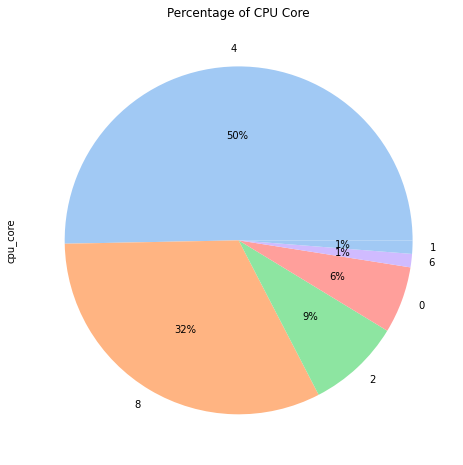

In [7]:
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(12,8))
pie = data.cpu_core.value_counts().plot(kind='pie',colors = colors, autopct='%.0f%%')
pie.set_title("Percentage of CPU Core")
plt.show()

50% of phones have **4-core CPU**s while 30% have **8-core CPU**s.

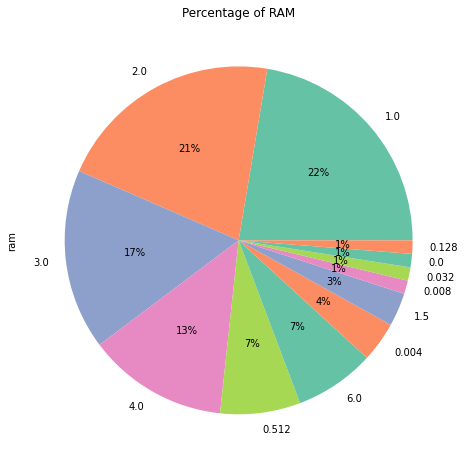

In [8]:
colors = sns.color_palette('Set2')[0:5]

plt.figure(figsize=(12,8))
pie = data.ram.value_counts().plot(kind='pie',colors = colors, autopct='%.0f%%')
pie.set_title("Percentage of RAM")
plt.show()

The majority of them are phones with 1 GB RAM with 22%, followed by phones with 2 GB RAM with a small margin. The amount of RAM that should be in smartphones today is 6 GB on average, while this rate is only 7%. Before the effect of RAM on phone prices, we can understand from the fact that the first eight of the 10 most expensive phones examined have 6 GB of RAM.

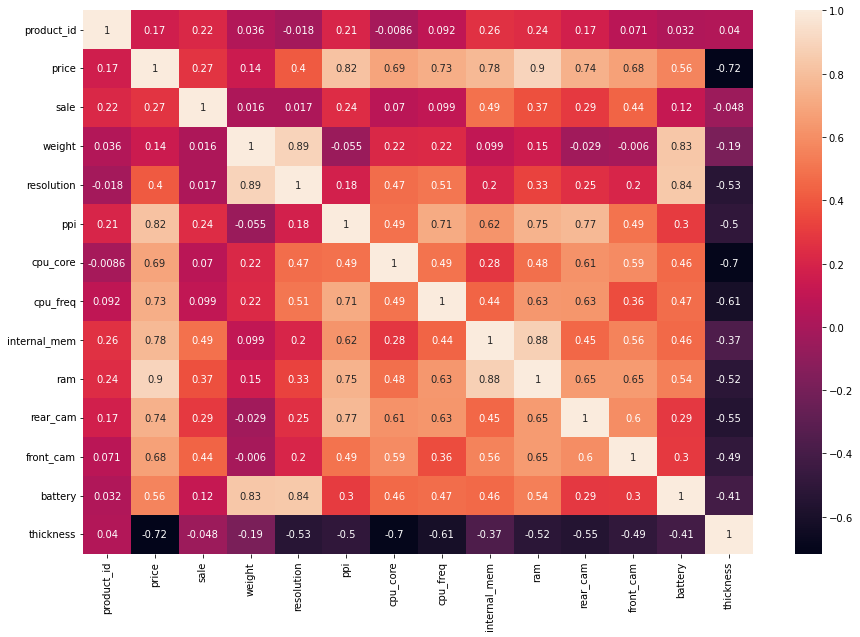

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True);